# Session 2

# FRAME

How are we framing 

- Default: Whether the loan defaulted or not
- Amount: Is the amount of loan given out
- Grade: Is the credit grade e.g. FICO / CIBIL equivalent
- Years: No of years they are working?
- Ownership: What type of house do they live in?
- Income: How much they earn? 
- Age: Physical Age in yrs

What is our **features=X** and our **target = y**?
```
y = default
X = amount, grade, years, ownership, income, age
```

# ACQUIRE

How can I acquire data?
 - Flat files (csv, tsv) (pandas)
 - Databases (pandas, sql-alchemy)
 - APIs (requests)
 - Scaping (beautiful-soup, scrapy)
 - Collect manually 

Size vs Tools
- Data is Small to Medium - Pandas
- Data is Medium to Large - Dask
- Data is Large to Extra-Large - Spark

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline
plt.style.use("ggplot")

In [7]:
df = pd.read_csv("data/historical_loan.csv")

In [8]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [10]:
df.columns

Index(['default', 'amount', 'grade', 'years', 'ownership', 'income', 'age'], dtype='object')

In [11]:
df.dtypes

default        int64
amount         int64
grade         object
years        float64
ownership     object
income       float64
age            int64
dtype: object

In [16]:
df.memory_usage().sum()/1000/1000

0.43279199999999995

# REFINE

In [17]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


```
default - nominal (2-class / category/ buckets)
amount - ratio
grade - ordinal
years - ratio
ownership - nominal
income - ratio
age - ratio
```

Do checks
- Check for missing values?
- Check for garbage stuff/ quality???
- Check for outliers?
- Standardize data - Clean dates, names, 

### Check for missing values

In [20]:
df.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

Treatment for Missing Values
- REMOVE THE ROWS
- IMPUTATION
    - Copy previous / next value (in true in time-dependent data)
    - Statistical value: Mean, Median, Mode
        - Nominal: Mode
        - Ordinal: Median / Mode
        - Ratio: Mean / Median
    - Specific numbers / 999
- CONVERT interval to categorical data
- Modelling to fill it up ?

Python Package - missingno

In [24]:
df.years.isnull().sum() /df.shape[0]

0.03610715672317846

In [26]:
np.mean(df.years)

6.086331901181525

In [27]:
# Let us fill up with median
df.years = df.years.fillna(np.mean(df.years))

In [29]:
df.isnull().sum()

default      0
amount       0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

### Explore

- Class Balance
    - 60/30: What we are doing
    - 90/10: Unbalanced - sklearn-unbalanced
    - 99.9/0.1: Anomaly Detection Based Tools

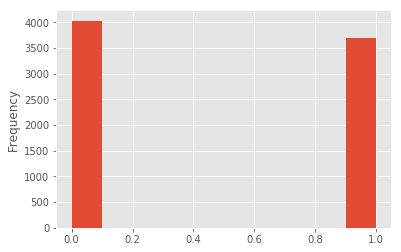

In [31]:
# Create histogram from target variable - default
df.default.plot.hist();

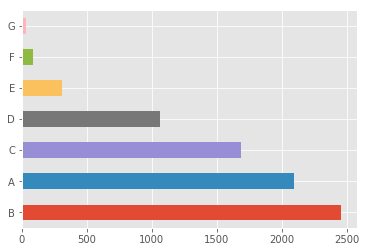

In [35]:
# Explore grade
df.grade.value_counts().plot.barh()

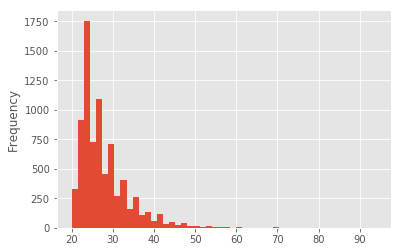

In [37]:
df.age.plot.hist(bins=50)

In [39]:
# Is this really true???
df.age.max()

94

In [40]:
df[df.age == 94]

,default,amount,grade,years,ownership,income,age
7714,1,6500,C,1.0,RENT,24000.0,94


## TRANSFORM

- CREATE NEW FEATURES: `featuretools`, Manual Creation
- MANUAL CREATION: Grouping, Summarizing, Deriving
- ENCODING (Categorical Data): Label Encoding, One-hot Encoding
- ...

In [42]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [43]:
df_encoded = df.copy()

In [48]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [46]:
# Ownership - Label Encoder
le_ownership = LabelEncoder()
le_ownership.fit(df.ownership)
df_encoded["ownership"] = le_ownership.transform(df.ownership)

In [54]:
dfT = pd.get_dummies(df_encoded)

In [55]:
dfT.head()

,default,amount,years,ownership,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G
0,0,1000,2.0,3,19200.0,24,0,1,0,0,0,0,0
1,1,6500,2.0,0,66000.0,28,1,0,0,0,0,0,0
2,0,2400,2.0,3,60000.0,36,1,0,0,0,0,0,0
3,0,10000,3.0,3,62000.0,24,0,0,1,0,0,0,0
4,1,4000,2.0,3,20000.0,28,0,0,1,0,0,0,0


## MODEL

Algorithm
1. LINEAR
2. TREE
3. NEURAL NETWORKS
4. ...

Choices:
1. Interpretibiliy
2. Run-time
3. Model Complexity
4. Scalability


### Step 1: Create Feature and Targets

In [66]:
# Total number of columns
len(list(dfT.columns))

13

In [67]:
X = dfT.iloc[:, 1:13]
y = dfT.default

### Step 2: Build the Model

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
# Instantiate the object
clf_dt = DecisionTreeClassifier(max_depth=10, random_state=42)

In [91]:
clf_dt.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [92]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [117]:
def cross_val(clf, k):
    
    # Instantiate Stratified K-Fold
    kf = StratifiedKFold(n_splits=k)
    
    # Let's use array to keep the scores
    kfold_train_scores = []
    kfold_val_scores = []
    
    # Run Stratified KFold Cross Validation
    for train_index, test_index in kf.split(X,y):
        clf = clf.fit(X.iloc[train_index], y.iloc[train_index])
        
        y_pred_train = clf.predict(X.iloc[train_index])
        train_acc = accuracy_score(y.iloc[train_index], y_pred_train)
        
        y_pred = clf.predict(X.iloc[test_index])
        val_acc = accuracy_score(y.iloc[test_index], y_pred)
        
        #print(train_acc, val_acc)
        kfold_train_scores.append(train_acc)
        kfold_val_scores.append(val_acc)
        
    #print("Mean Score \n")
    return (np.mean(kfold_train_scores), np.mean(kfold_val_scores))

In [118]:
cross_val(clf_dt, 5)

(0.7468299472962483, 0.6279335334530702)

### Question - Over Fitting / Under Fitting

- Decision Tree with Depth
    - 4
    - 8
    - 12
    - 15
    - max_depth

In [146]:
def clf_depth(clf, depth):
    train_acc_scores = []
    val_acc_scores = []
    depth = np.arange(1,20)
    for i in depth:
        clf = clf.set_params(max_depth = i)
        train_acc, val_acc = cross_val(clf, 5)
        train_acc_scores.append(train_acc)
        val_acc_scores.append(val_acc)
        
    df_scores = pd.DataFrame({
        "depth": depth,
        "train_acc": train_acc_scores,
        "val_acc": val_acc_scores
    })
    df_scores.index = df_scores.depth
    
    df_scores.train_acc.plot()
    df_scores.val_acc.plot()

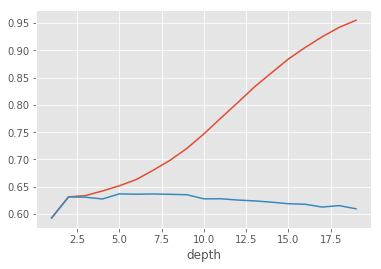

In [147]:
clf_depth(clf_dt, 20)

In [142]:
rf = RandomForestClassifier(max_depth=10)